# Project 2: Customer segmentation using Machine Learning

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly as py 
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Mall_Customers.csv',index_col="CustomerID")
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.drop(['Gender'],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


<Axes: xlabel='Age', ylabel='Density'>

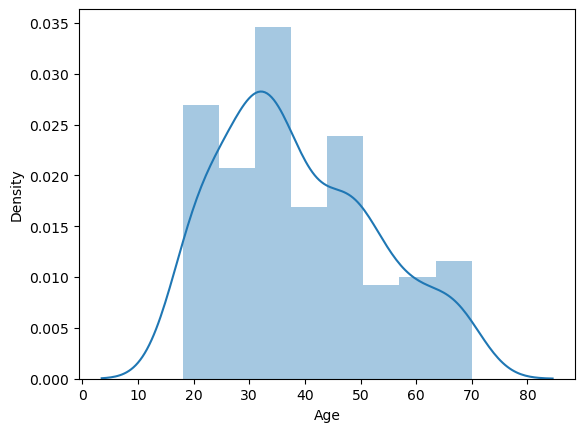

In [6]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

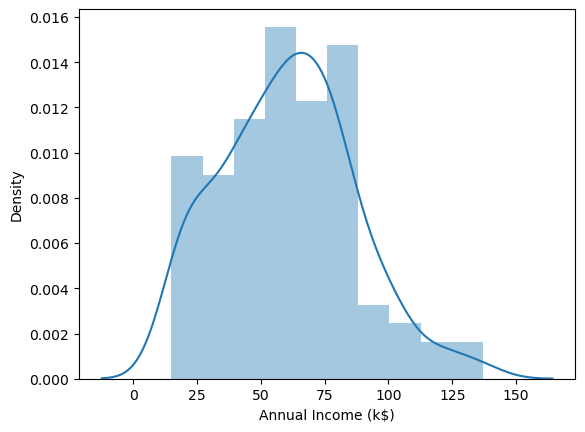

In [7]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

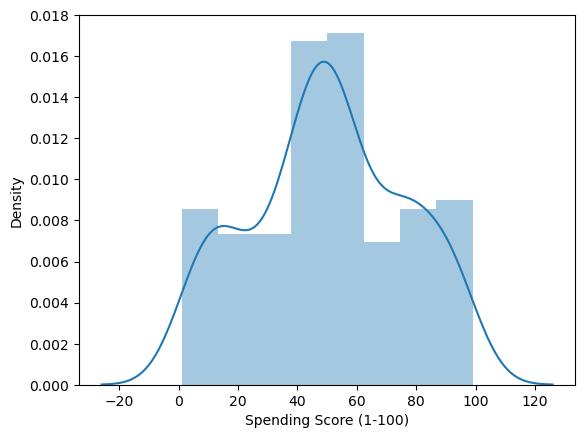

In [8]:
sns.distplot(df['Spending Score (1-100)'])

#  **PLOTTING ANNUAL INCOME AND SPENDING SCORE**

In [9]:
df1=df[["Annual Income (k$)","Spending Score (1-100)"]]
df1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


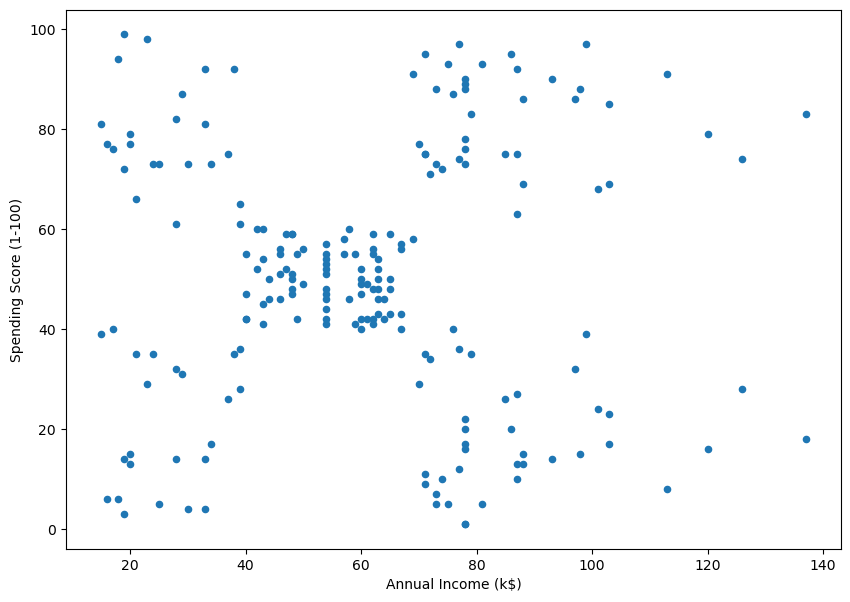

In [10]:
df1.plot(kind="scatter",x="Annual Income (k$)",y="Spending Score (1-100)",figsize=(10,7))
plt.show()

In [11]:
sum_of_sqr_dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(df1)
    sum_of_sqr_dist[k]=km.inertia_

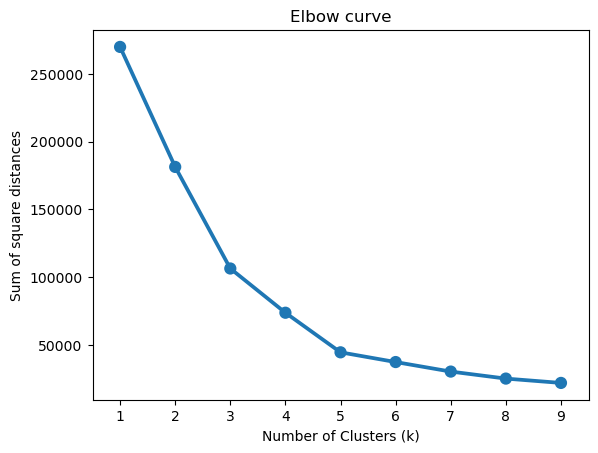

In [12]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()),y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of square distances")
plt.title("Elbow curve")
plt.show()

***Choosing 5 as K***

In [13]:
model=KMeans(n_clusters=5,init="k-means++",max_iter=1000)
model.fit(df1)

KMeans(max_iter=1000, n_clusters=5)

In [14]:
print("labels", model.labels_)

labels [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [15]:
print("Centroids",model.cluster_centers_)

Centroids [[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


In [16]:
centroids=model.cluster_centers_

In [17]:
df1_cluster=df1.copy()
df1_cluster["cluster"]=model.fit_predict(df1)

In [18]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,3
2,15,81,4
3,16,6,3
4,16,77,4
5,17,40,3


In [19]:
color=['red','yellow','green','blue','pink']
df1_cluster['color']=df1_cluster['cluster'].map(lambda p:color[p])

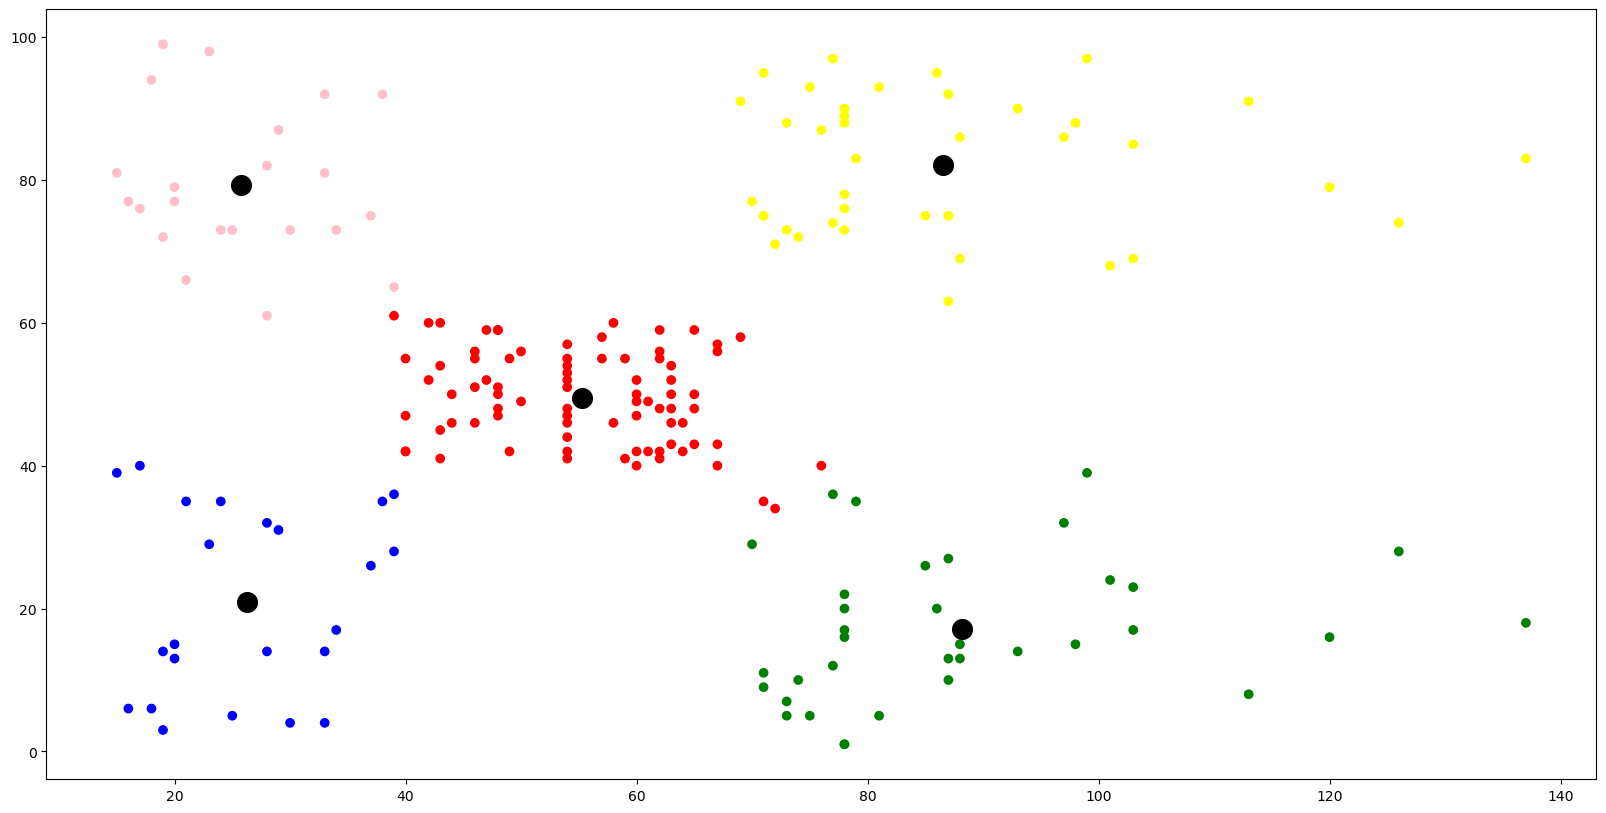

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c=df1_cluster["color"])
plt.scatter(centroids[:,0], centroids[:,1],c='black',s=200)

In [21]:
labels=model.labels_

***ANALYSING THE SILHOUETTE SCORE TO CHECK IF WE PICKED THE CORRECT VALUE OF K***

In [22]:
silhouette_score(df1,labels)

0.553931997444648

In [23]:
silhouette={}
for k in range(2,8):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km.fit(df1)
    silhouette[k]=silhouette_score(df1,km.labels_)

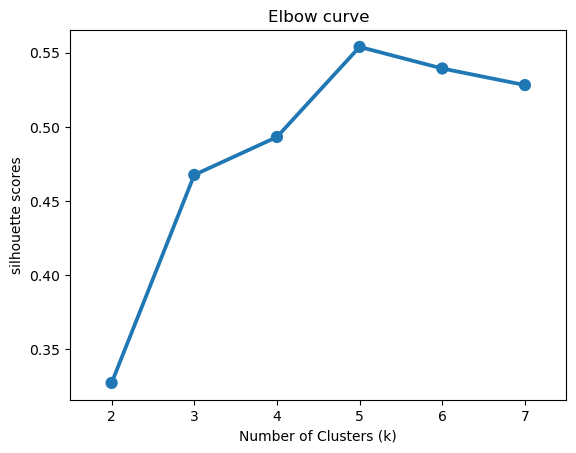

In [24]:
sns.pointplot(x=list(silhouette.keys()),y=list(silhouette.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette scores")
plt.title("Elbow curve")
plt.show()

#  **PLOTTING AGE AND SPENDING SCORE**

In [25]:
df3=df[["Age","Spending Score (1-100)"]]
df3

,Age,Spending Score (1-100)
CustomerID,,
1,19,39
2,21,81
3,20,6
4,23,77
5,31,40
...,...,...
196,35,79
197,45,28
198,32,74


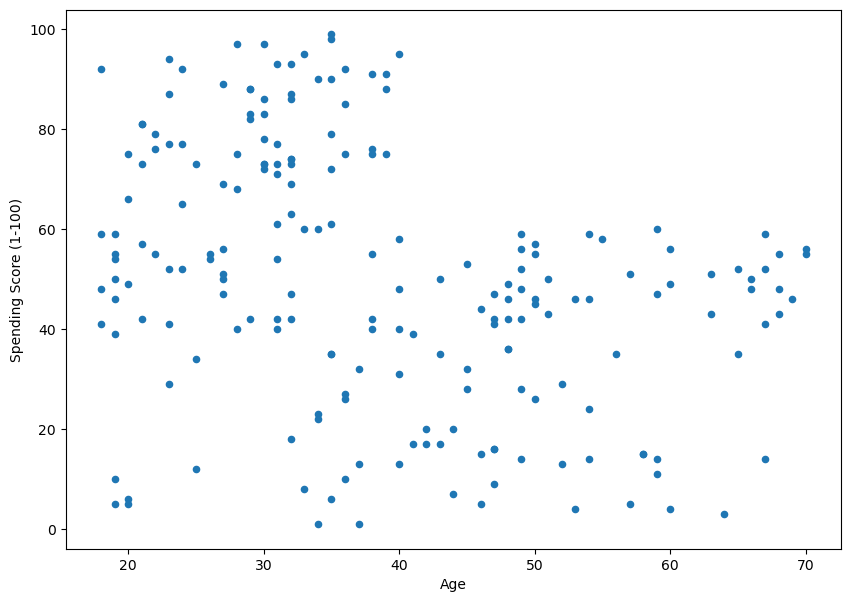

In [26]:
df3.plot(kind="scatter",x="Age",y="Spending Score (1-100)",figsize=(10,7))
plt.show()

In [27]:
sum_of_sqr_dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(df3)
    sum_of_sqr_dist[k]=km.inertia_

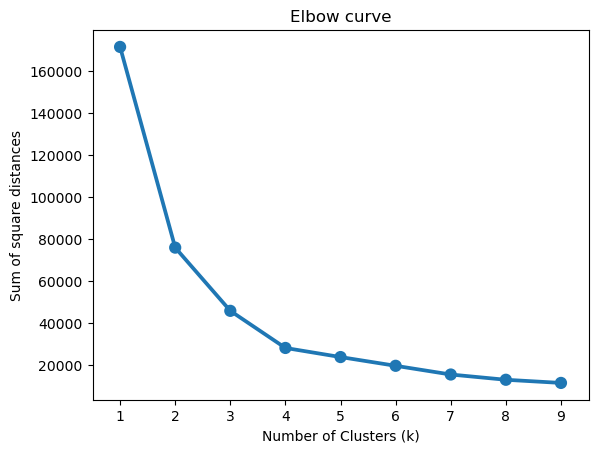

In [28]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()),y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of square distances")
plt.title("Elbow curve")
plt.show()

In [29]:
model=KMeans(n_clusters=4,init="k-means++",max_iter=1000)
model.fit(df3)

KMeans(max_iter=1000, n_clusters=4)

In [30]:
print("labels", model.labels_)

labels [0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [31]:
print("Centroids",model.cluster_centers_)

Centroids [[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


In [32]:
centroids=model.cluster_centers_

In [33]:
df3_cluster=df3.copy()
df3_cluster["cluster"]=model.fit_predict(df3)

In [34]:
df3_cluster.head()

,Age,Spending Score (1-100),cluster
CustomerID,,,
1,19,39,1
2,21,81,2
3,20,6,3
4,23,77,2
5,31,40,1


In [35]:
color=['red','yellow','green','blue']
df3_cluster['color']=df3_cluster['cluster'].map(lambda p:color[p])

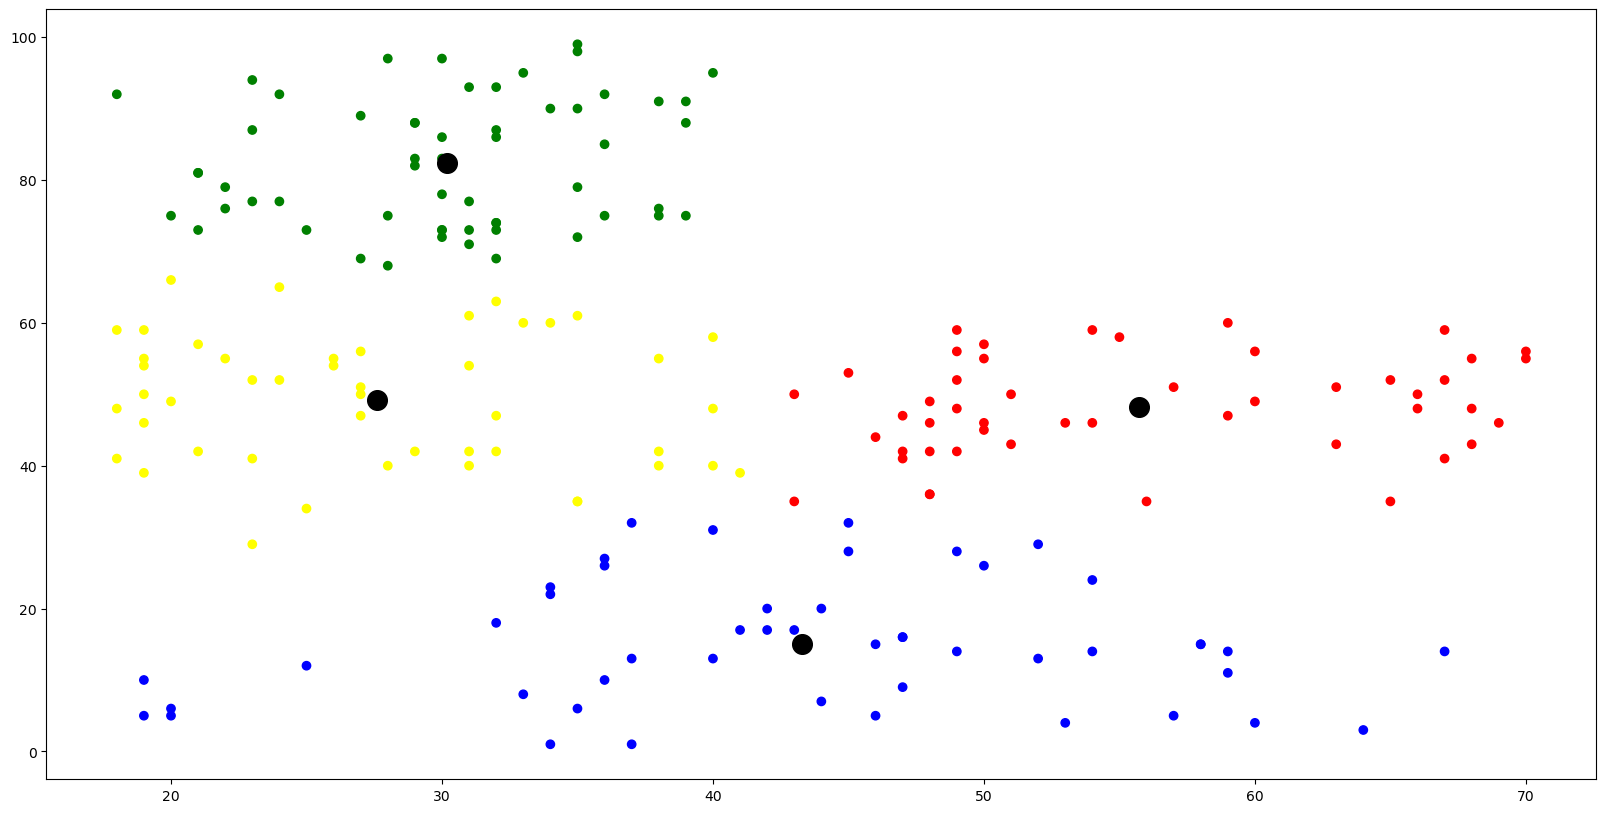

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(df3["Age"],df3["Spending Score (1-100)"],c=df3_cluster["color"])
plt.scatter(centroids[:,0], centroids[:,1],c='black',s=200)

***ANALYSING SILHOUETTE SCORE TO CHECK IF WE PICKED THE CORRECT VALUE OF K***

In [37]:
silhouette_score(df3,labels)

0.1632888738101461

In [38]:
silhouette={}
for k in range(2,8):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km.fit(df3)
    silhouette[k]=silhouette_score(df3,km.labels_)

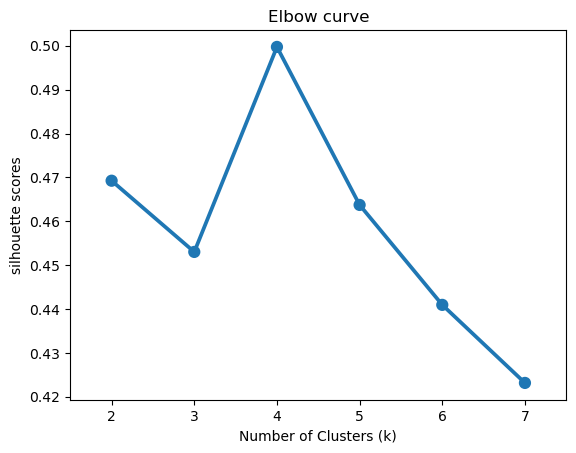

In [39]:
sns.pointplot(x=list(silhouette.keys()),y=list(silhouette.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette scores")
plt.title("Elbow curve")
plt.show()

# **ANALYSING ALL 3 FACTORS SIMULTANEOUSLY**

In [40]:
df2=df.copy()

In [41]:
sum_of_sqr_dist={}
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(df2)
    sum_of_sqr_dist[k]=km.inertia_

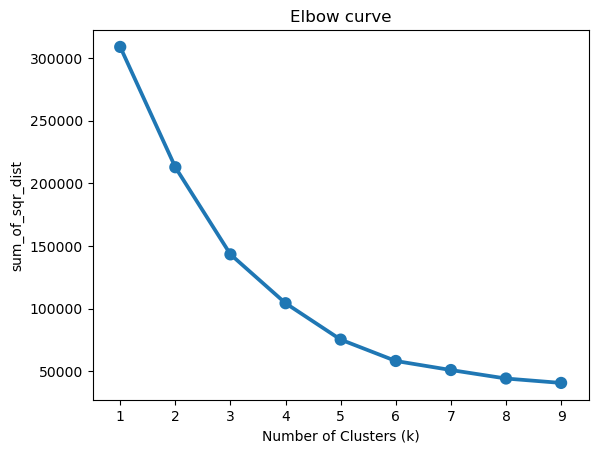

In [42]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()),y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("sum_of_sqr_dist")
plt.title("Elbow curve")
plt.show()

choosing k=6

In [43]:
model2=KMeans(n_clusters=6,init='k-means++',max_iter=1000)
model2.fit(df2)

KMeans(max_iter=1000, n_clusters=6)

In [44]:
df2['cluster']=model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,19,15,39,0
2,21,15,81,3
3,20,16,6,0
4,23,16,77,3
5,31,17,40,0


In [45]:
labels=model2.labels_
centroids=model2.cluster_centers_

In [46]:
df2['labels']=labels
trace= go.Scatter3d(
                   x=df2["Age"],
                   y=df2["Annual Income (k$)"],
                   z=df2["Spending Score (1-100)"],
                   mode="markers",
                   marker=dict(color=df2['labels'],size=5,line=dict(color=df2['labels'],width=12),opacity=0.8))
centroids_data=go.Scatter3d(
                            x=centroids[:,0],
                            y=centroids[:,1],
                            z=centroids[:,2],
                            mode='markers',
                            marker=dict(color='black',size=10,symbol='diamond'))
data=[trace,centroids_data]
layout=go.Layout(
                title="Clusters",
                scene=dict(
                          xaxis=dict(title='Age'),
                          yaxis=dict(title='Annual Income (k$)'),
                          zaxis=dict(title='Spending Score (1-100)')
                          ))
fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)
plt.show()
#Blue- young (avg age=25), low annual income (average income= 25k), high spending score-76
#Purple- young(avg age-32), high annual income(average income- 86k),high spending score- 82
#Orange- middle age(avg age-44), low annual income(average income-25k), low spending score-19
#Red- middle age(avg age-56), median annual income( avg income-53k), mid spending score-49
#Yellow- young(27),median annual income(56k),mid spending score-49
#Pink- middle age(44),high annual income(88k),low spending score-17

In [47]:
print(centroids_data)

Scatter3d({
    'marker': {'color': 'black', 'size': 10, 'symbol': 'diamond'},
    'mode': 'markers',
    'x': array([44.14285714, 32.69230769, 41.68571429, 25.27272727, 27.        ,
                56.15555556]),
    'y': array([25.14285714, 86.53846154, 88.22857143, 25.72727273, 56.65789474,
                53.37777778]),
    'z': array([19.52380952, 82.12820513, 17.28571429, 79.36363636, 49.13157895,
                49.08888889])
})
